# TCSS 478/588 In-class Exercise: Linear regression

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in data (same as last week)
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [1]:
getwd()

[1] "C:/Users/radeshpa/Desktop/BioInformatics/Assignment3"

In [2]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
my.data[1:5, 1:6]

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773,-0.007325439
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396,0.070951154
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781,0.025003360
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348,0.024005885
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959,-0.001752450


In [9]:
dim (my.data) # the total number of observations is 438

[1] 438 978

## 2. Linear Regression.

In [7]:
lmFit1 <- lm(my.data$CDK1 ~ my.data$UBE2C)

In [8]:
summary(lmFit1)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096025 -0.014247  0.003149  0.017000  0.071622 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005261   0.001214  -4.336 1.81e-05 ***
my.data$UBE2C  0.480930   0.037563  12.803  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02491 on 436 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2716 
F-statistic: 163.9 on 1 and 436 DF,  p-value: < 2.2e-16


In [10]:
names(lmFit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [11]:
lmFit1$coefficients

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

In [12]:
coef(lmFit1)

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

In [13]:
# compute predicted values given the estimated regression coefficients
predict.lmFit1 <- predict(lmFit1)

In [14]:
predict.lmFit1

1             2             3             4             5 
-7.773099e-03 -1.511643e-02 -1.726771e-02  1.036767e-02 -1.170592e-02 
            6             7             8             9            10 
-1.266865e-03 -1.436746e-02 -6.542832e-03 -6.853536e-03 -1.305685e-02 
           11            12            13            14            15 
 5.797723e-03  6.892715e-03 -7.054738e-03 -2.452015e-02 -4.571061e-02 
           16            17            18            19            20 
-2.216179e-02 -9.346294e-03 -9.623844e-03  6.564038e-03 -1.154769e-02 
           21            22            23            24            25 
-5.930274e-03 -1.133412e-02 -1.553733e-02 -2.191097e-02 -2.219491e-03 
           26            27            28            29            30 
-1.178123e-03 -6.153621e-03 -1.915419e-02 -3.254498e-02 -1.047793e-02 
           31            32            33            34            35 
 3.835392e-02 -1.479730e-02 -4.768922e-03  6.651921e-03 -8.945497e-03 
           36            37            38            39            40 
-1.808617e-02 -1.093341e-02 -6.478671e-03 -1.621136e-02  9.011081e-03 
           41            42            43            44            45 
 1.053750e-02 -8.658863e-03  6.352742e-03 -5.942501e-02  9.258221e-03 
           46            47            48            49            50 
-7.139469e-03 -4.783296e-03 -3.457690e-02  7.193972e-03  1.497348e-03 
           51            52            53            54            55 
-3.611716e-02 -8.171480e-03 -9.922407e-03 -2.866353e-02 -6.822604e-03 
           56            57            58            59            60 
 3.491613e-04  3.081921e-05 -1.165397e-02 -3.616732e-04 -7.621137e-02 
           61            62            63            64            65 
 2.491089e-02  1.202058e-02  1.325298e-02 -2.115354e-02  1.980894e-04 
           66            67            68            69            70 
-1.130355e-02 -1.412276e-03  7.463779e-03  4.715335e-03 -8.603621e-03 
           71            72            73            74            75 
 2.771079e-04 -6.682935e-03 -1.389449e-03 -2.569148e-02 -6.858887e-03 
           76            77            78            79            80 
-9.002972e-03 -1.235288e-02  7.575787e-04 -9.918338e-03 -2.713245e-02 
           81            82            83            84            85 
-1.703324e-04  7.271027e-04 -1.518612e-04 -1.266952e-02  2.597634e-04 
           86            87            88            89            90 
-1.559350e-02 -2.226990e-02 -1.501623e-02 -1.384602e-02  5.770644e-03 
           91            92            93            94            95 
-5.522463e-03 -1.563366e-02 -5.938844e-03 -6.966740e-03  5.951306e-03 
           96            97            98            99           100 
-1.546448e-02 -1.520434e-02 -2.993233e-03 -3.310648e-03 -8.243558e-03 
          101           102           103           104           105 
-2.042576e-02 -8.878847e-03  1.226660e-03  3.680773e-02  8.278660e-03 
          106           107           108           109           110 
 9.759092e-03 -3.301246e-02 -1.826103e-02  9.550010e-03 -5.993198e-03 
          111           112           113           114           115 
-4.805101e-03 -5.280042e-03 -8.679722e-03 -1.233714e-02 -3.860128e-02 
          116           117           118           119           120 
-5.753567e-04  1.455275e-03 -4.377527e-03  6.986660e-03  1.949836e-04 
          121           122           123           124           125 
-2.840914e-02  6.162617e-03 -8.122125e-03 -1.328461e-03  1.272742e-02 
          126           127           128           129           130 
-1.551909e-02 -1.316418e-02 -5.365385e-03  1.145631e-02  5.509241e-04 
          131           132           133           134           135 
-1.084498e-02 -5.214993e-02 -1.377324e-02 -1.816516e-03 -1.162339e-03 
          136           137           138           139           140 
 1.339928e-04 -1.318613e-02  1.317902e-02  1.775689e-03 -1.985430e-02 
          141           142         

In [23]:
# Calculate the RSS
curr.RSS <- sum((my.data$CDK1 - predict.lmFit1)^2)

In [24]:
curr.RSS

[1] 0.2705229

In [25]:
curr.RSE <- sqrt(curr.RSS/(438-2))

In [26]:
curr.RSE

[1] 0.02490914

In [27]:
# compute R squared
curr.TSS <- sum((my.data$CDK1 - mean(my.data$CDK1))^2)
curr.Rsquared <- (curr.TSS - curr.RSS)/curr.TSS
curr.Rsquared

[1] 0.2732375

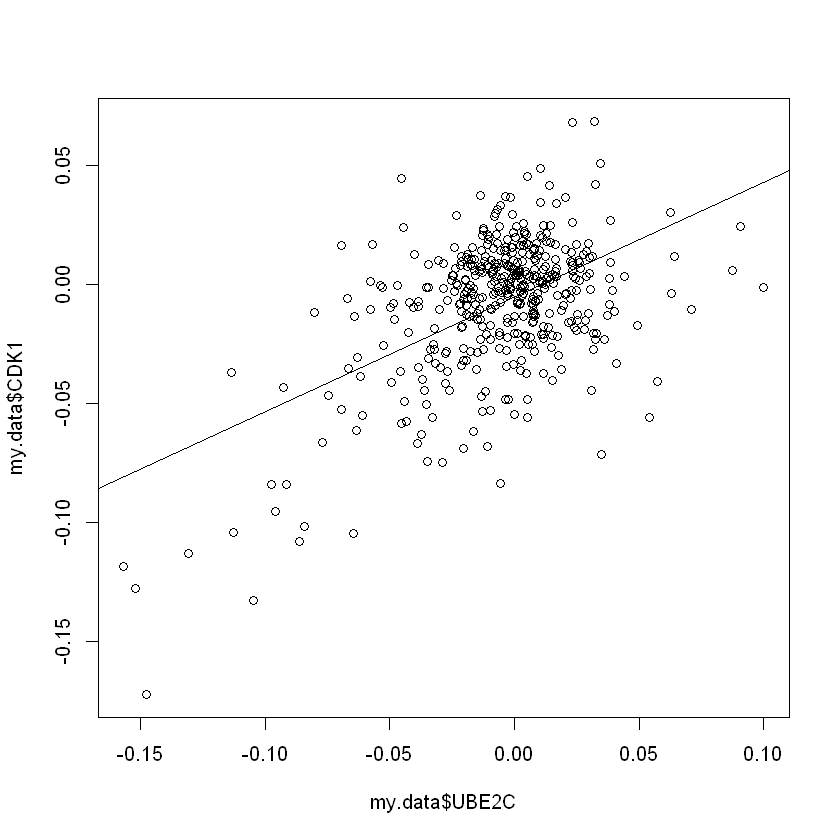

In [28]:
plot(my.data$UBE2C, my.data$CDK1)
abline(lmFit1)

In [29]:
lmFit2 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)
summary(lmFit2)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095512 -0.014494  0.003057  0.016405  0.067388 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005638   0.001208  -4.666 4.10e-06 ***
my.data$UBE2C  0.465947   0.037439  12.446  < 2e-16 ***
my.data$ATF1   0.187601   0.045325   4.139 4.19e-05 ***
my.data$RHOA   0.004271   0.051644   0.083    0.934    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02449 on 434 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.296 
F-statistic: 62.25 on 3 and 434 DF,  p-value: < 2.2e-16
